# Bitcoin SARIMAX analysis
Context:-Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary.


Abstract: This analysis is an attempt to use ARIMA in analyzing bitcoin prices from the Bitstamp exchange. The objective is to create a model that is able to forecast future prices, identify trends, seasonality, and other remarkable properties. Theoretically, analysis like this could be used in trading.

Description of columns in dataset:-
Timestamp-Start time of time window (60s window), in Unix time, 
Open-Open price at start time window, 
High-High price within time window, 
Low-Low price within time window, 
Close-Close price at end of time window, 
Volume_(BTC)-Amount of BTC transacted in time window, 
Volume_(Currency)-Amount of Currency transacted in time window, 
Weighted_Price-volume-weighted average price (VWAP)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import bamboolib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
import datetime
from datetime import date
import random
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import gc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
df = pd.read_csv('c:/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')


In [3]:
df.shape

(3778817, 8)

In [102]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:52:00,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Unix-time( 1 jan 1970) to 
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

In [29]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.index = df.Timestamp

In [110]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:52:00,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Resampling to daily frequency
df_daily = df.resample('D').mean()

In [33]:
df_daily.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [34]:
# Resampling to monthly frequency
df_month = df.resample('M').mean()

In [35]:
df_month.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-31,6.345389,6.348982,6.341218,6.346148,4.031777,25.168238,6.345955
2012-02-29,5.230208,5.231646,5.227036,5.228510,8.313993,42.239422,5.228443
2012-03-31,4.985481,4.986695,4.982580,4.983828,15.197791,76.509751,4.984397
2012-04-30,4.995171,4.996447,4.993763,4.995079,21.683913,108.218094,4.995091


In [36]:
# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

In [37]:
df_Q.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-03-31,5.477714,5.479719,5.474339,5.476768,9.473001,49.282894,5.476890
2012-06-30,5.587766,5.589126,5.586414,5.587763,27.063281,155.714638,5.587793
2012-09-30,10.327893,10.332271,10.322662,10.326911,19.446149,197.766814,10.327578
2012-12-31,11.987362,11.989673,11.984587,11.986864,22.819409,275.620682,11.986756


In [38]:
# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

In [39]:
df_year.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-12-31,10.094570,10.097488,10.091053,10.093934,21.328197,216.485795,10.094143
2013-12-31,254.281420,254.658978,253.855315,254.264327,15.734087,4851.052777,254.242741
2014-12-31,527.132511,527.571308,526.679647,527.137609,12.617999,6568.182937,527.113071
2015-12-31,274.366745,274.509271,274.208588,274.364343,14.823699,4146.228635,274.353829


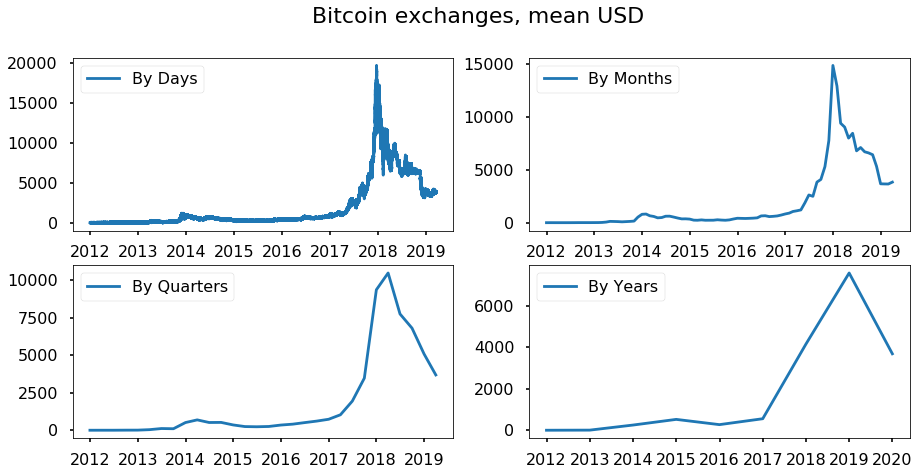

In [40]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

# We will predict bitcoin prices by months.

Stationarity check and STL-decomposition of the series

Our time series is not stationary - for it to be stationary it requires that the mean and variance remain constant over time. Dickey-Fuller test is the math way of determining whether it's stationary or not, let's run that now so we have a baseline for future comparisons.

Dickey–Fuller test: p=0.362775


<Figure size 1080x504 with 0 Axes>

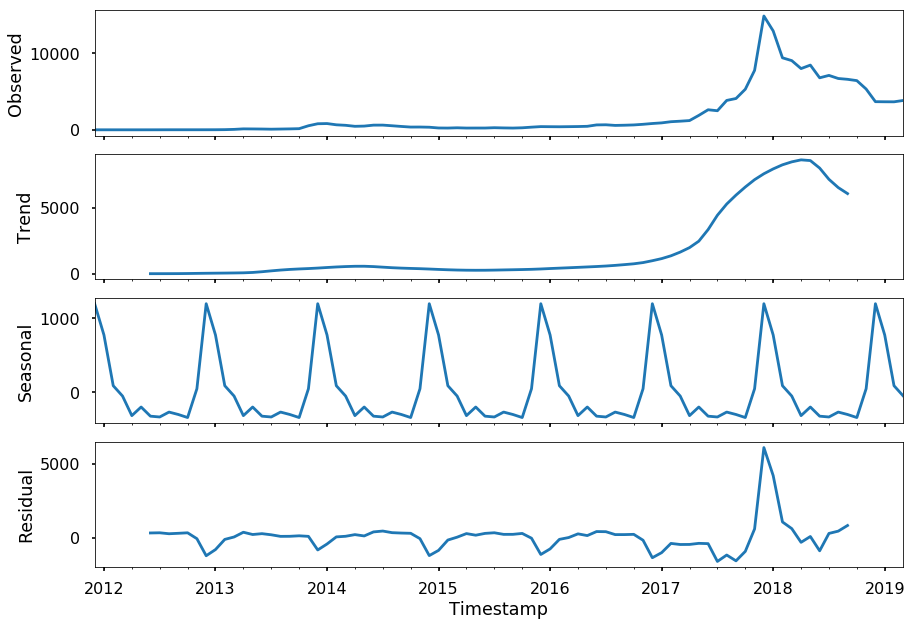

In [41]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.Weighted_Price).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])
plt.show()

The series are not stationary.

The p-value is too high to reject the null hypothesis.
Based on the initial curve of the graph, the data needs to be transformed to get it stationary.

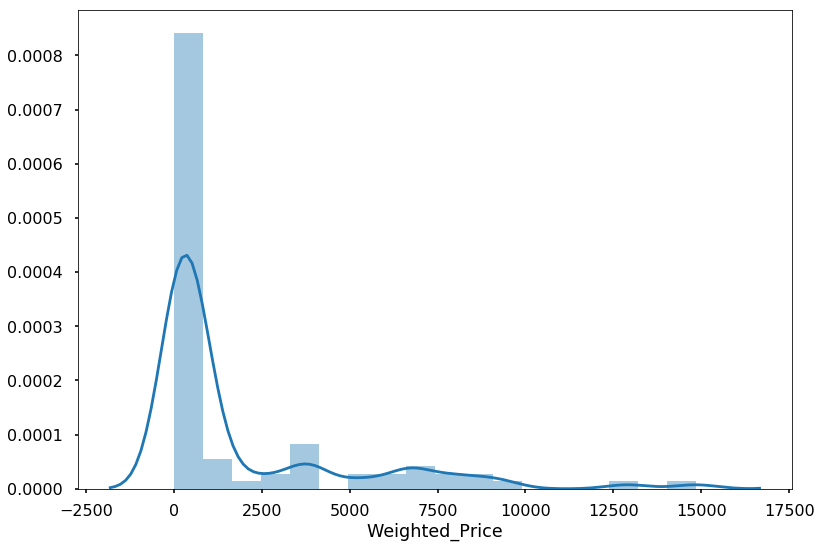

In [42]:
sns.distplot(df_month.Weighted_Price)

In [48]:
# Box-Cox Transformations( (y^lmbda -1)/Lmbda  if lmba!=0)
df_month['Weighted_Price_box'], lmbda = stats.boxcox(df_month.Weighted_Price)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

Dickey–Fuller test: p=0.362775


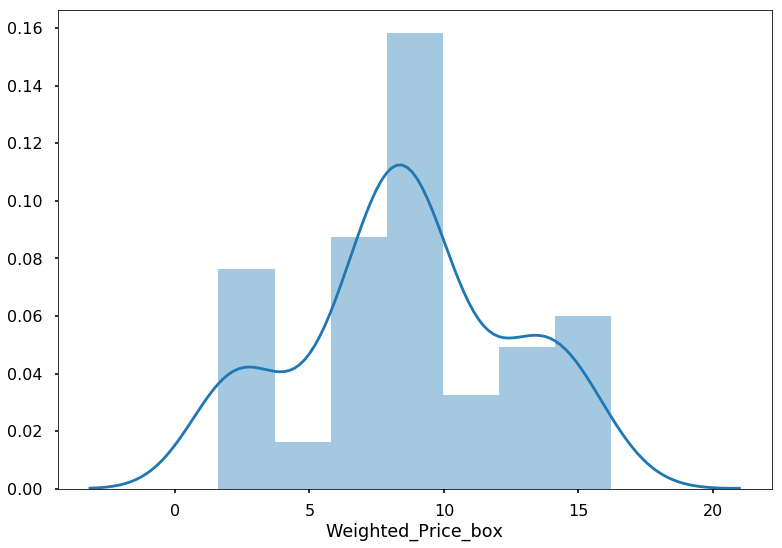

In [49]:
sns.distplot(df_month.Weighted_Price_box)

Seasonal differentiation

In [50]:
# Seasonal differentiation
df_month['prices_box_diff'] = df_month.Weighted_Price_box - df_month.Weighted_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.273999


The series are not stationary.

In [53]:
# Regular differentiation
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)

print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1])

Dickey–Fuller test: p=0.000030


The series are stationary.

Summary: Now that we have achieved stationarity, the next step is to build an ARIMA model. In building a model three terms are needed p,q,d: p = # of AR term using PACF, d = # of differences, q = # of MA term using ACF.

# Model Selection


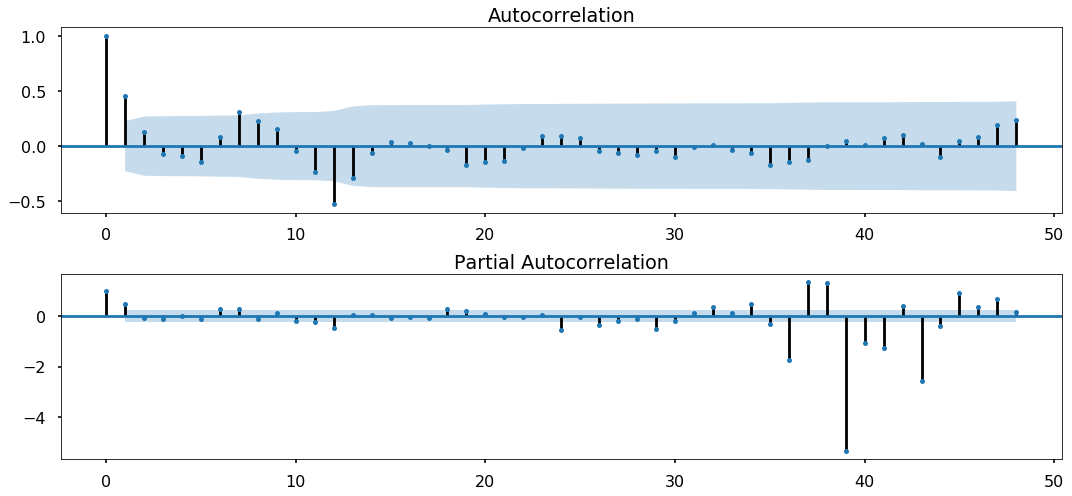

In [54]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()


In [55]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Weighted_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (2, 1, 0, 0)
wrong parameters: (2, 1, 0, 1)
wrong parameters: (2, 1, 1, 0)
wrong parameters: (2, 1, 1, 1)
wrong parameters: (2, 1, 2, 0)
wrong parameters: (2, 1, 2, 1)


In [57]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
21  (1, 0, 1, 1)  118.064811
9   (0, 1, 1, 1)  119.792952
23  (1, 0, 2, 1)  120.045166
39  (2, 0, 1, 1)  120.048884
27  (1, 1, 1, 1)  120.049795
                                 Statespace Model Results                                 
Dep. Variable:                 Weighted_Price_box   No. Observations:                   88
Model:             SARIMAX(1, 1, 0)x(1, 1, 1, 12)   Log Likelihood                 -55.032
Date:                            Fri, 02 Aug 2019   AIC                            118.065
Time:                                    16:16:44   BIC                            127.335
Sample:                                12-31-2011   HQIC                           121.766
                                     - 03-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

Analysis of residues

Dickey–Fuller test:: p=0.000000


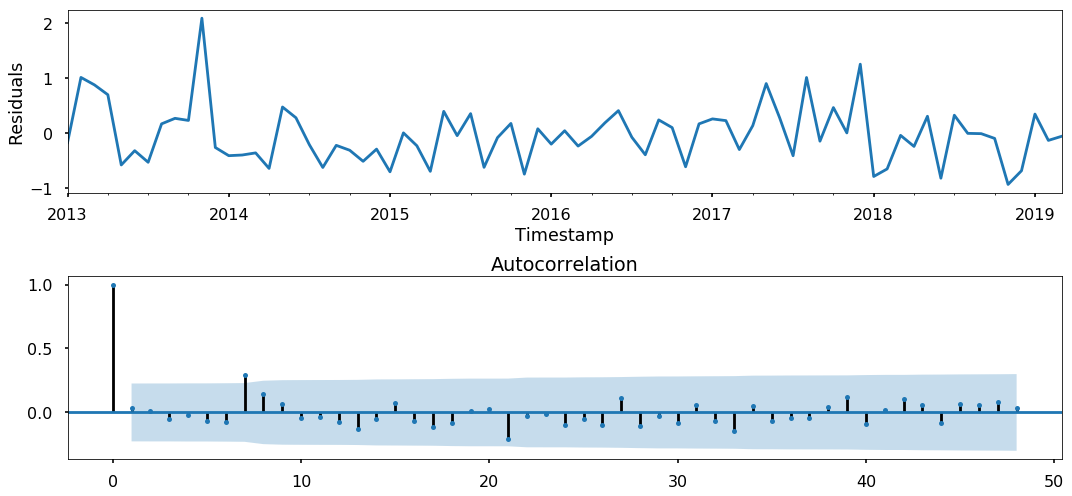

In [58]:
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

Forecasting

In [59]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

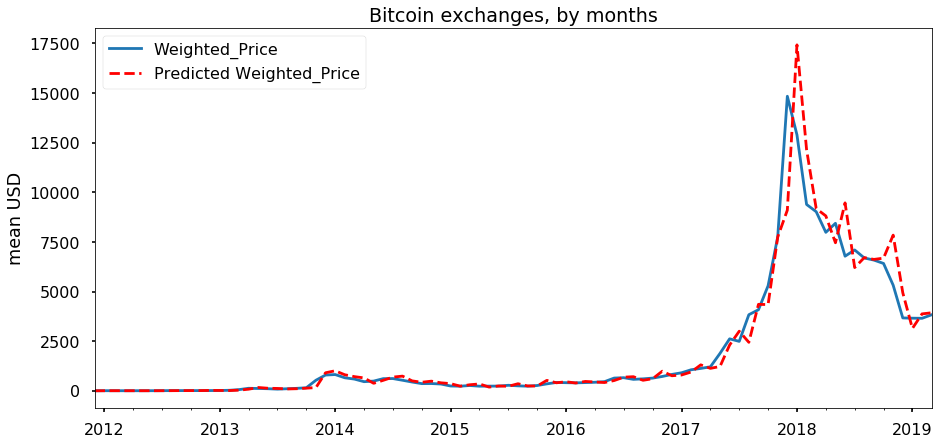

In [116]:
# Forecast
df_month2 = df_month[['Weighted_Price']]

future = pd.DataFrame( columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=100), lmbda)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

In [111]:
df_month.Weighted_Price.tail()

Timestamp
2018-11-30    5321.281997
2018-12-31    3672.419306
2019-01-31    3659.467919
2019-02-28    3653.638677
2019-03-31    3831.243494
Freq: M, Name: Weighted_Price, dtype: float64

In [112]:
forecast = invboxcox(best_model.forecast(steps=9), lmbda)

In [113]:
forecast # coming 9 months

2019-04-30     3970.245596
2019-05-31     4476.388154
2019-06-30     5443.830522
2019-07-31     5453.247591
2019-08-31     6038.113490
2019-09-30     6122.425962
2019-10-31     6784.901974
2019-11-30     9219.101167
2019-12-31    12646.640924
Freq: M, dtype: float64